# Installing libraries to work in Colab

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.9 MB/s eta 0:00:00


In [2]:
!pip install pandas matplotlib seaborn wordcloud

# Importing libraries & Combining the dataset

In [3]:
import re
from datasets import load_dataset
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
nltk.download('punkt') # Required for the tokenization library
nltk.download('stopwords') # Required to obtain the stop words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
'''
Dataset information:
- labels:
    0: "hate-speech"
    1: "offensive-speech"
    2: "neither"
- tweet: string
'''

dataset = load_dataset('badmatr11x/hate-offensive-speech')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/51070 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2838 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2837 [00:00<?, ? examples/s]

In [6]:
df1 = pd.DataFrame(dataset['train'])
df1

,label,tweet
0,2,where's his other half??? i want to indulge my...
1,2,easier for barrack hussein obama to blame guns...
2,2,As soon as a Democrat gets a chance to ? the p...
3,1,GOOD Music &gt;&gt;&gt;&gt;&gt; Young Money fags
4,2,mass shooting at orlando gay nightclub: what w...
...,...,...
51065,0,"@user ultimately, a #joke from early #2016 tha..."
51066,2,#vehicle gorilla simulator: you need to do t...
51067,2,"honey, i got nothing to lose.. &lt;3 #love #su..."
51068,2,#crookedhilary #imwither -not! #hillary #hilla...


In [7]:
df2 = pd.DataFrame(dataset['test'])
df2

,label,tweet
0,1,That boy has always been a pussy never been a ...
1,1,RT @koleworld4: every time i come out im never...
2,1,Ayee hoe
3,2,wasn't i supposed 2 saveð..but then i thoug...
4,1,hahaha my girl just popped on a bitch like a M...
...,...,...
2832,2,"@NG5_ Thirsty Giants are always like ""ho, ho, ho"""
2833,1,Ahmed's moms bomb pussy&gt;&gt;&gt;
2834,2,staing my new job on monday..... ...
2835,1,Nd these hoes all kno I'm workin wit a 9 I ain...


In [8]:
df3 = pd.DataFrame(dataset['validation'])
df3

,label,tweet
0,2,"mashed potatoes , string beans , yellow rice ,..."
1,2,best of soundtrack #best #bestoftheday #gameof...
2,1,I'll still let the plastic bitch do her dollar...
3,2,&#8220;@SexualMedic: How I feel when I'm throw...
4,2,@ImSooooMad guess who's eating cracker b witho...
...,...,...
2833,2,@CruzanChoklate look at you with yellow fever.
2834,1,RT @BelowThaaBelt_: Snip snip hoe
2835,1,Who the hell taught you how to fuck bitch toot...
2836,1,&#8220;@NeiAllure: &amp; you should feel disre...


In [9]:
dataset_concat = pd.concat([df1, df2])
dataset_concat = pd.concat([dataset_concat, df3])
df = dataset_concat.copy()
df

,label,tweet
0,2,where's his other half??? i want to indulge my...
1,2,easier for barrack hussein obama to blame guns...
2,2,As soon as a Democrat gets a chance to ? the p...
3,1,GOOD Music &gt;&gt;&gt;&gt;&gt; Young Money fags
4,2,mass shooting at orlando gay nightclub: what w...
...,...,...
2833,2,@CruzanChoklate look at you with yellow fever.
2834,1,RT @BelowThaaBelt_: Snip snip hoe
2835,1,Who the hell taught you how to fuck bitch toot...
2836,1,&#8220;@NeiAllure: &amp; you should feel disre...


In [10]:
df.head()

,label,tweet
0,2,where's his other half??? i want to indulge my...
1,2,easier for barrack hussein obama to blame guns...
2,2,As soon as a Democrat gets a chance to ? the p...
3,1,GOOD Music &gt;&gt;&gt;&gt;&gt; Young Money fags
4,2,mass shooting at orlando gay nightclub: what w...


# EDA

In [11]:
# Display basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56745 entries, 0 to 2837
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   56745 non-null  int64 
 1   tweet   56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [12]:
# Display summary statistics
df.describe()

,label
count,56745.000000
mean,1.532399
std,0.615124
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [13]:
# Check missing values
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [14]:
# Count the number of each class
class_counts = df['label'].value_counts()
class_counts

2    33883
1    19190
0     3672
Name: label, dtype: int64

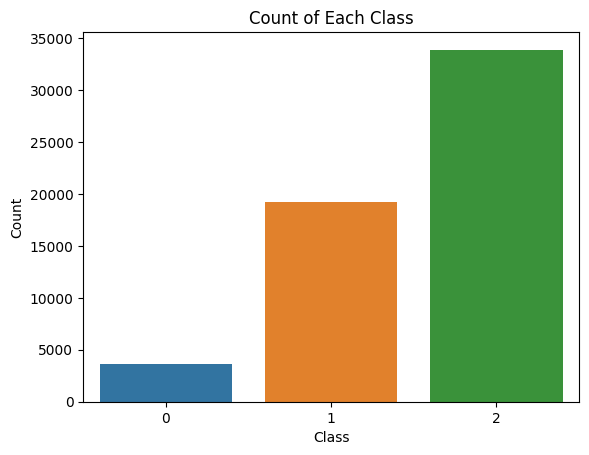

In [15]:
# Visualize the count of each class in a bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The dataset appears to be imbalanced, meaning that some classes may have significantly more observations than others. To address this issue, we will apply a down-sampling technique.



# Preprocessing

In [16]:
# Inputs the original tweet from the dataset & Returns a cleaned tweet as a string
def cleaning(tweet):
  tweet = tweet.lower() # convert text to lowercase
  tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet) # remove URLs starting at the beginning of the text
  tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet) # remove URLs in the middle of the text
  tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet) # remove URLs at the end of the text
  # expand contractions
  tweet = re.sub(r"that's","that is",tweet)
  tweet = re.sub(r"there's","there is",tweet)
  tweet = re.sub(r"what's","what is",tweet)
  tweet = re.sub(r"where's","where is",tweet)
  tweet = re.sub(r"it's","it is",tweet)
  tweet = re.sub(r"who's","who is",tweet)
  tweet = re.sub(r"i'm","i am",tweet)
  tweet = re.sub(r"she's","she is",tweet)
  tweet = re.sub(r"he's","he is",tweet)
  tweet = re.sub(r"they're","they are",tweet)
  tweet = re.sub(r"who're","who are",tweet)
  tweet = re.sub(r"ain't","am not",tweet)
  tweet = re.sub(r"wouldn't","would not",tweet)
  tweet = re.sub(r"shouldn't","should not",tweet)
  tweet = re.sub(r"can't","can not",tweet)
  tweet = re.sub(r"couldn't","could not",tweet)
  tweet = re.sub(r"won't","will not",tweet)
  tweet = re.sub(r"\W"," ",tweet) # remove non-word characters (punctuation)
  tweet = re.sub(r"\d"," ",tweet) # remove digits
  tweet = re.sub(r'^(user\s*)+', '', tweet) # does not work as expected, remove 'user' at the beginning of the text (multiple occurrences)
  tweet = re.sub(r"^(rt\s+)+"," ",tweet) # remove 'rt' at the beginning of the text (multiple occurrences)
  tweet = re.sub(r"\s+[a-z]\s+"," ",tweet) # remove single characters in the middle of the text surrounded by spaces
  tweet = re.sub(r"\s+[a-z]$"," ",tweet) # remove single characters at the end of the text surrounded by spaces
  tweet = re.sub(r"^[a-z]\s+"," ",tweet) # remove single characters at the beginning of the text surrounded by spaces
  tweet = re.sub(r"\[[0-9]*\]"," ",tweet) # remove square brackets and numbers inside them
  tweet = re.sub(r"\s+gt"," ",tweet) # remove 'gt' after a space
  tweet = re.sub(r'[^A-Za-z0-9 ]+','',tweet) # remove all characters except letters, numbers and spaces
  return tweet

# Inputs the a list of words & Returns a string of words after removing the stop words
def stop_words(words):
    combinedWords = ' '.join([word for word in words if word not in (stopWords)])
    return combinedWords

# Inputs the tweet & Returns a list of tokenized words
def tokenize(tweet):
    words = nltk.word_tokenize(tweet)
    return words

# Preprocesses, tokenizes, and removes stop words from tweet using other functions
def finalpreprocess(tweet):
    return stop_words(tokenize(cleaning(tweet)))

stopWords = stopwords.words('english')
df = dataset_concat.copy()
df['tweet'] = df['tweet'].apply(lambda x:finalpreprocess(x))
df.head(10)

,label,tweet
0,2,half want indulge lot yunho esp dancing keep h...
1,2,easier barrack hussein obama blame guns kind r...
2,2,soon democrat gets chance political hack foxne...
3,1,good music young money fags
4,2,mass shooting orlando gay nightclub know unbel...
5,2,user user guys going take forever bring new gmc
6,1,niggah niggah
7,1,goin back school hoes class two
8,2,user new music coming hear sneak peek newmusic...
9,2,actually give father gift


In [17]:
df.sample(20)

,label,tweet
44872,2,finished gardening
13983,2,great summer posturetips body good
13009,1,im married retard must good together nigga hun...
22856,2,another great day user thanks came fcbd much f...
312,2,sleep amp im early tomorrow user
25079,2,user got potato
1222,2,photos seen go site
46421,1,hgshit bookieg aye fucked yo bitch mistake
38130,0,vinitahegwood get job naacp ag hear like diver...
25981,2,user thankyou stud proud close never gave


# Data downsampling

In [18]:
# Perform the downsampling
df = pd.concat([df[df['label']==2].sample(3672),
                       df[df['label']==1].sample(3672),
                       df[df['label']==0].sample(3672)])
df.groupby('label').count()

,tweet
label,
0,3672
1,3672
2,3672


In [19]:
train_df, _ = train_test_split(df, test_size=0.2, random_state=42)
valid_df, test_df = train_test_split(_, test_size=0.5, random_state=42)

# Words Visualization

In [20]:
# Create a function to generate a WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

WordCloud for Hate Speech:


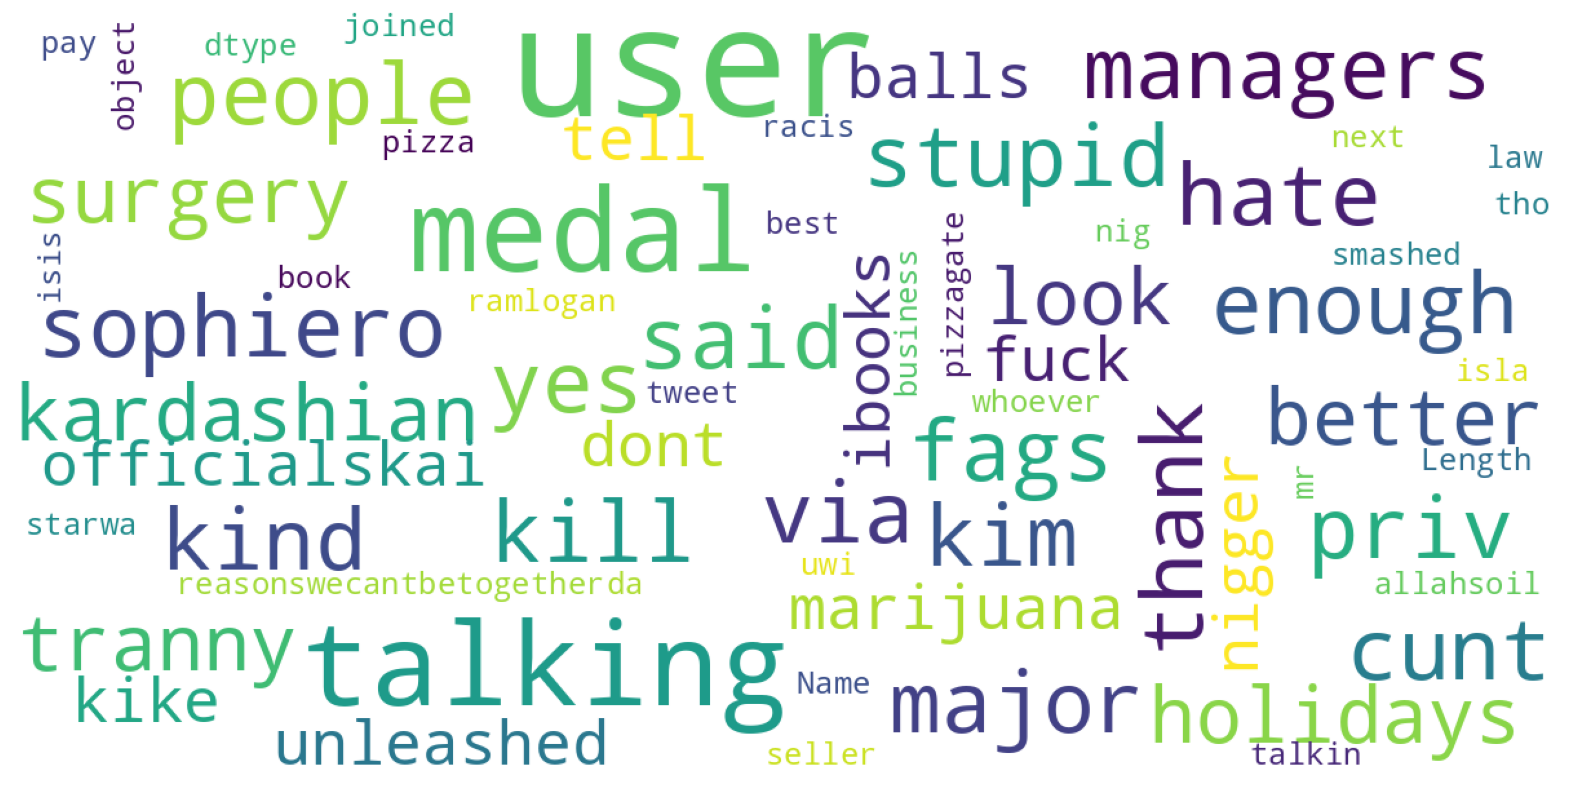

WordCloud for Offensive Language:


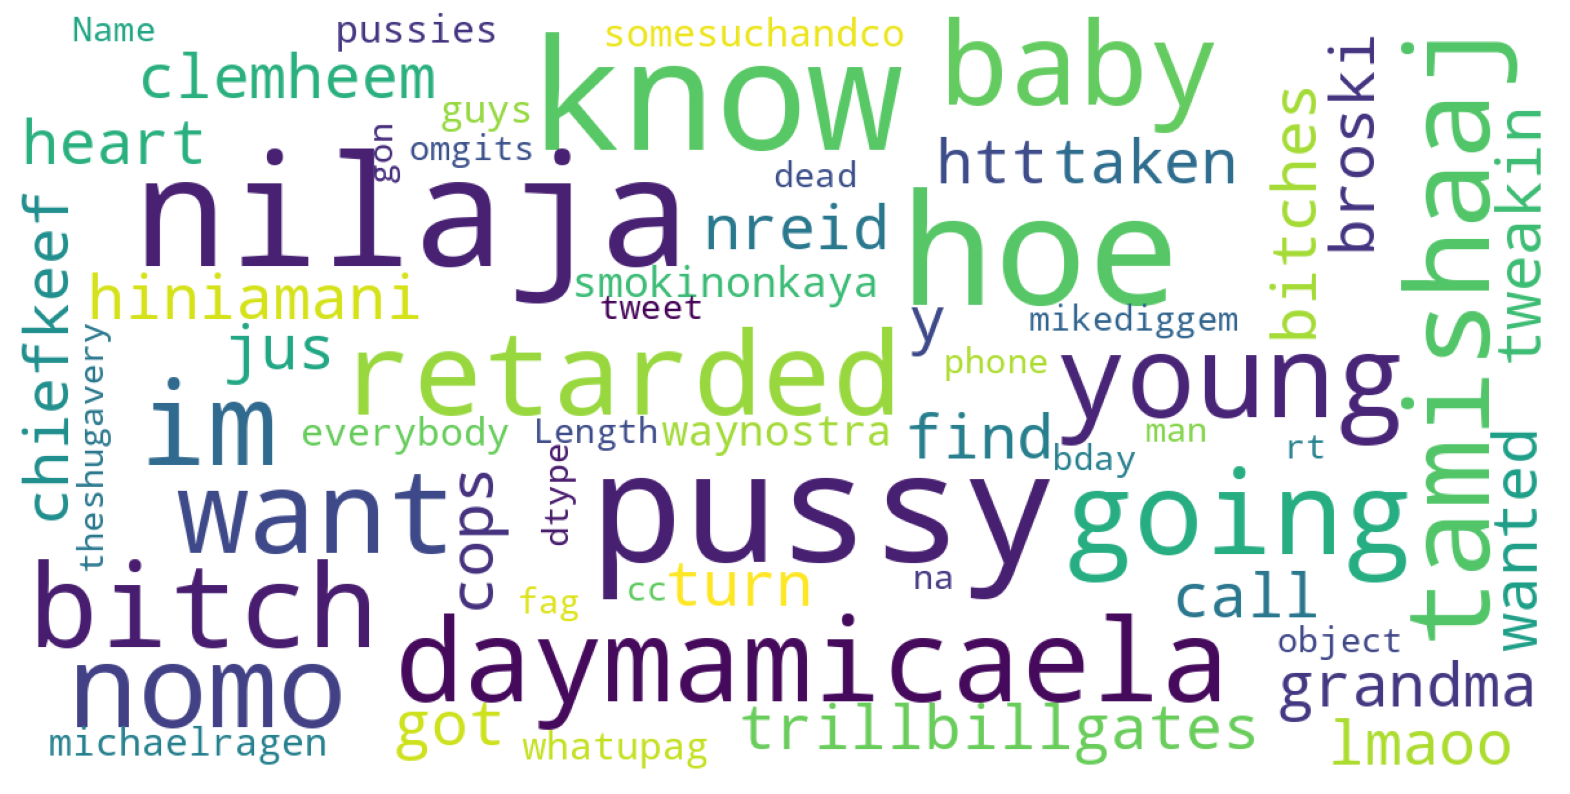

WordCloud for Neither:


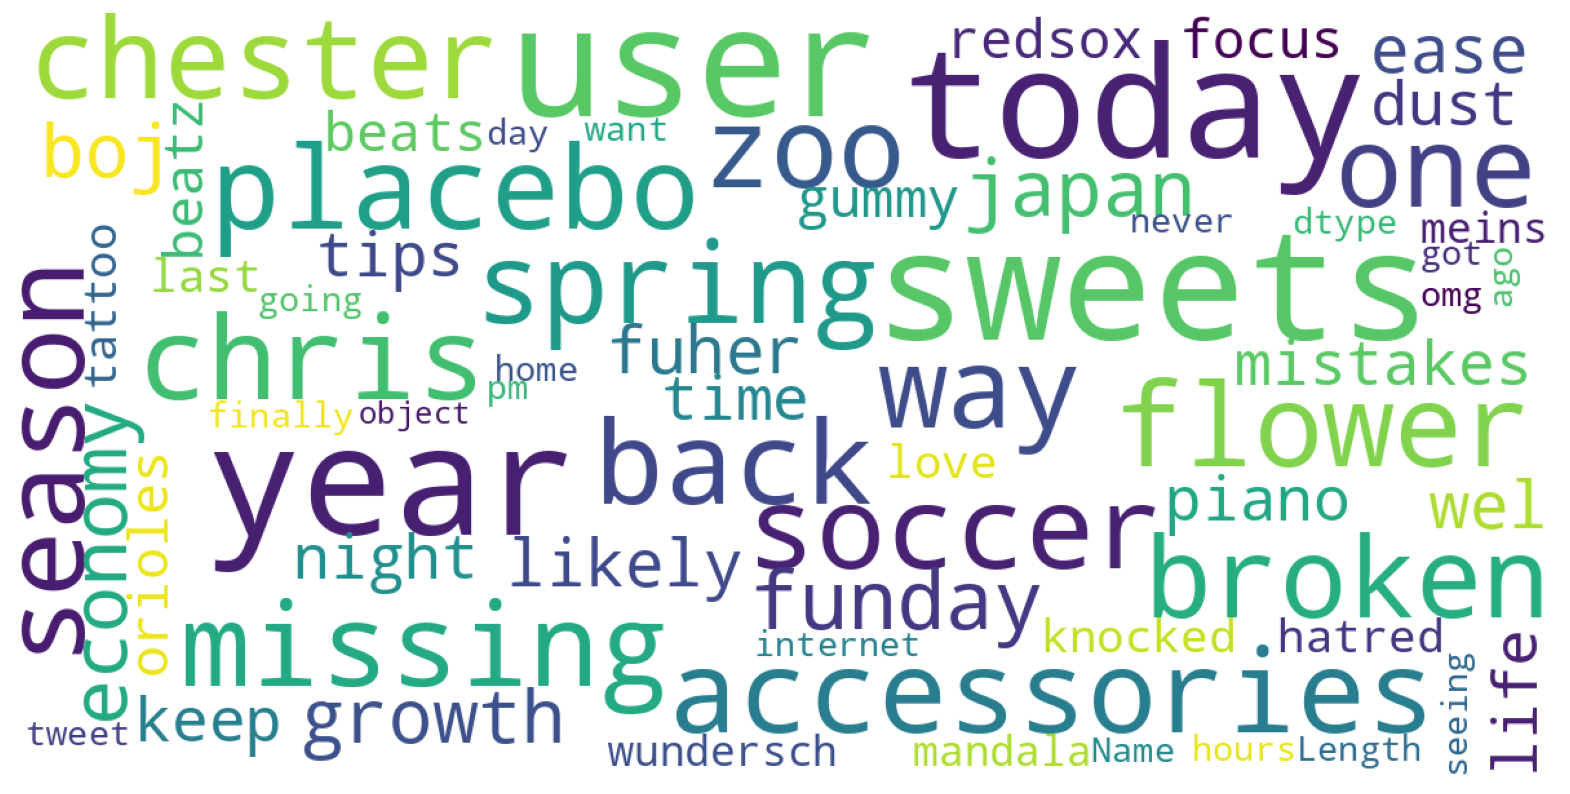

In [21]:
# Generate a WordCloud for each class
print("WordCloud for Hate Speech:")
show_wordcloud(df[df['label'] == 0]['tweet'])

print("WordCloud for Offensive Language:")
show_wordcloud(df[df['label'] == 1]['tweet'])

print("WordCloud for Neither:")
show_wordcloud(df[df['label'] == 2]['tweet'])

# Baseline model: Logistic regression

In [22]:
# Load the dataset
texts = df.tweet  # list of text samples
labels = df.label  # list of corresponding labels (0, 1, or 2)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert the text to a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Scales the data to zero mean & unit variance
# scaler = StandardScaler(with_mean=False)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train a logistic regression classifier
classifier = LogisticRegression(max_iter = 100,
                                random_state = 42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Results

Accuracy: 0.838021778584392


Text(0.5, 36.72222222222221, 'Predicted Values')

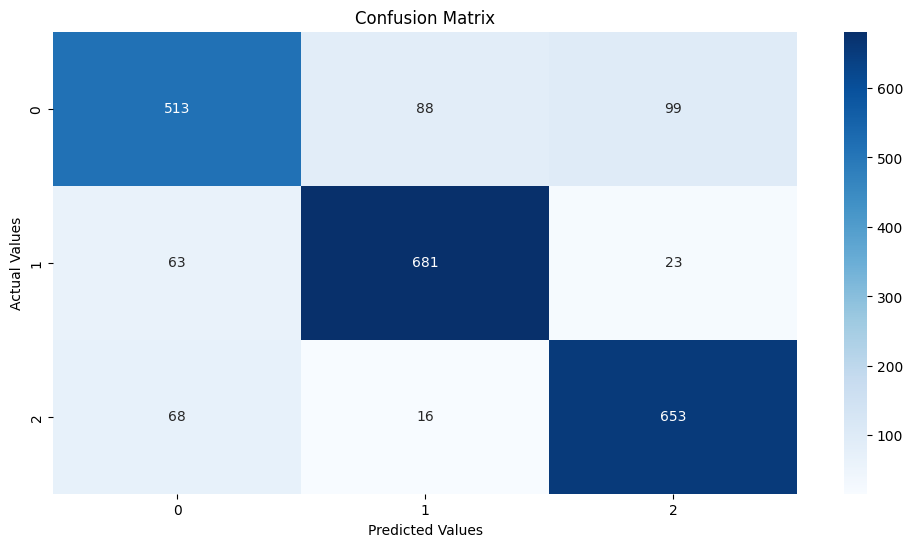

In [23]:
# Evaluate the accuracy & obtain the confusion matrix of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# Execution time comparision

In [24]:
# # Slow code
# import time
# start_time = time.time()
# #convert to lowercase, strip and remove punctuations
# def fullpreprocess(tweet):
#     tweet = tweet.lower()
#     tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
#     tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
#     tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
#     tweet = re.sub(r"that's","that is",tweet)
#     tweet = re.sub(r"there's","there is",tweet)
#     tweet = re.sub(r"what's","what is",tweet)
#     tweet = re.sub(r"where's","where is",tweet)
#     tweet = re.sub(r"it's","it is",tweet)
#     tweet = re.sub(r"who's","who is",tweet)
#     tweet = re.sub(r"i'm","i am",tweet)
#     tweet = re.sub(r"she's","she is",tweet)
#     tweet = re.sub(r"he's","he is",tweet)
#     tweet = re.sub(r"they're","they are",tweet)
#     tweet = re.sub(r"who're","who are",tweet)
#     tweet = re.sub(r"ain't","am not",tweet)
#     tweet = re.sub(r"wouldn't","would not",tweet)
#     tweet = re.sub(r"shouldn't","should not",tweet)
#     tweet = re.sub(r"can't","can not",tweet)
#     tweet = re.sub(r"couldn't","could not",tweet)
#     tweet = re.sub(r"won't","will not",tweet)
#     tweet = re.sub(r"\W"," ",tweet)
#     tweet = re.sub(r"\d"," ",tweet)
#     tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
#     tweet = re.sub(r"\s+[a-z]$"," ",tweet)
#     tweet = re.sub(r"^[a-z]\s+"," ",tweet)
#     tweet = re.sub(r"\s+"," ",tweet)
#     tweet = re.sub(r'\[[0-9]*\]',' ',tweet)
#     words = nltk.word_tokenize(tweet)
#     words = [x for x in words if x not in stopwords.words('english')]
#     tweet = ' '.join(words)
#     return tweet

# stop_words = stopwords.words('english')
# df = dataset_concat.copy()
# df['tweet'] = df['tweet'].apply(lambda x:fullpreprocess(x))
# print("--- %s seconds ---" % (time.time() - start_time))
# df.head(10)

In [25]:
# import time
# start_time = time.time()
# #convert to lowercase, strip and remove punctuations
# def preprocessing(tweet):
#     tweet = tweet.lower()
#     tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
#     tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
#     tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
#     tweet = re.sub(r"that's","that is",tweet)
#     tweet = re.sub(r"there's","there is",tweet)
#     tweet = re.sub(r"what's","what is",tweet)
#     tweet = re.sub(r"where's","where is",tweet)
#     tweet = re.sub(r"it's","it is",tweet)
#     tweet = re.sub(r"who's","who is",tweet)
#     tweet = re.sub(r"i'm","i am",tweet)
#     tweet = re.sub(r"she's","she is",tweet)
#     tweet = re.sub(r"he's","he is",tweet)
#     tweet = re.sub(r"they're","they are",tweet)
#     tweet = re.sub(r"who're","who are",tweet)
#     tweet = re.sub(r"ain't","am not",tweet)
#     tweet = re.sub(r"wouldn't","would not",tweet)
#     tweet = re.sub(r"shouldn't","should not",tweet)
#     tweet = re.sub(r"can't","can not",tweet)
#     tweet = re.sub(r"couldn't","could not",tweet)
#     tweet = re.sub(r"won't","will not",tweet)
#     tweet = re.sub(r"\W"," ",tweet)
#     tweet = re.sub(r"\d"," ",tweet)
#     tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
#     tweet = re.sub(r"\s+[a-z]$"," ",tweet)
#     tweet = re.sub(r"^[a-z]\s+"," ",tweet)
#     tweet = re.sub(r"\s+"," ",tweet)
#     tweet = re.sub(r'\[[0-9]*\]',' ',tweet)
#     return tweet

# def stop_words(words):
#   combinedWords = ' '.join([word for word in words if word not in (stopWords)])
#   return combinedWords

# def tokenize(tweet):
#   words = nltk.word_tokenize(tweet)
#   return words

# def finalpreprocess(tweet):
#     return stop_words(tokenize(preprocessing(tweet)))

# stopWords = stopwords.words('english')
# df = dataset_concat.copy()
# df['tweet'] = df['tweet'].apply(lambda x:finalpreprocess(x))

# print("--- %s seconds ---" % (time.time() - start_time))
# df.head(10)

# References

### NLP Tutorial for Text Classification in Python.
-- Link: https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e
### How To Implement Logistic Regression Text Classification In Python With Scikit-learn and PyTorch.
-- Link: https://spotintelligence.com/2023/02/22/logistic-regression-text-classification-python/
### Logistic Regression with StandardScaler-From the Scratch
-- Link: https://medium.com/@draj0718/logistic-regression-with-standardscaler-from-the-scratch-ec01def674e8

In [26]:
# Scratch cell

    # text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
#     text = re.sub(r'\d',' ',text)
#     text = re.sub(r'\s+',' ',text)

# # STOPWORD REMOVAL
# def stopword(string):
#     a= [i for i in string.split() if i not in stopwords.words('english')]
#     return ' '.join(a)#LEMMATIZATION
# # Initialize the lemmatizer
# wl = WordNetLemmatizer()

# # This is a helper function to map NTLK position tags
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN# Tokenize the sentence
# def lemmatizer(string):
#     word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
#     a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
#     return " ".join(a)

#Preprocessing


#Stemming/Limitization




#Remove stop words (remove ?!)
# nltk.download('stopwords')
# print(stopwords.words('english'))
# df['tweet'] = df['tweet'].apply(lambda x:x.lower())

#Embedding